![](https://raw.githubusercontent.com/Qinbf/tf-model-zoo/master/README_IMG/01.jpg)
AI MOOC： **www.ai-xlab.com**  
如果你也是AI爱好者，可以添加我的微信一起交流：**sdxxqbf**

In [ ]:
from sklearn.feature_extraction import DictVectorizer
from sklearn import tree
from sklearn import preprocessing
import csv

In [10]:
# 读入数据
Dtree = open(r'AllElectronics.csv', 'r')
reader = csv.reader(Dtree)

# 获取第一行数据
headers = reader.__next__()
print(headers)

# 定义两个列表
featureList = []
labelList = []

# 
for row in reader:
    # 把label存入list
    labelList.append(row[-1])
    rowDict = {}
    for i in range(1, len(row)-1):
        #建立一个数据字典
        rowDict[headers[i]] = row[i]
    # 把数据字典存入list
    featureList.append(rowDict)

print(featureList)

['RID', 'age', 'income', 'student', 'credit_rating', 'class_buys_computer']
[{'income': 'high', 'age': 'youth', 'credit_rating': 'fair', 'student': 'no'}, {'income': 'high', 'age': 'youth', 'credit_rating': 'excellent', 'student': 'no'}, {'income': 'high', 'age': 'middle_aged', 'credit_rating': 'fair', 'student': 'no'}, {'income': 'medium', 'age': 'senior', 'credit_rating': 'fair', 'student': 'no'}, {'income': 'low', 'age': 'senior', 'credit_rating': 'fair', 'student': 'yes'}, {'income': 'low', 'age': 'senior', 'credit_rating': 'excellent', 'student': 'yes'}, {'income': 'low', 'age': 'middle_aged', 'credit_rating': 'excellent', 'student': 'yes'}, {'income': 'medium', 'age': 'youth', 'credit_rating': 'fair', 'student': 'no'}, {'income': 'low', 'age': 'youth', 'credit_rating': 'fair', 'student': 'yes'}, {'income': 'medium', 'age': 'senior', 'credit_rating': 'fair', 'student': 'yes'}, {'income': 'medium', 'age': 'youth', 'credit_rating': 'excellent', 'student': 'yes'}, {'income': 'medium'

In [11]:
# 把数据转换成01表示
vec = DictVectorizer()
x_data = vec.fit_transform(featureList).toarray()
print("x_data: " + str(x_data))

# 打印属性名称
print(vec.get_feature_names())

# 打印标签
print("labelList: " + str(labelList))

# 把标签转换成01表示
lb = preprocessing.LabelBinarizer()
y_data = lb.fit_transform(labelList)
print("y_data: " + str(y_data))

x_data: [[0. 0. 1. 0. 1. 1. 0. 0. 1. 0.]
 [0. 0. 1. 1. 0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 1. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 0. 1. 0. 1.]
 [0. 0. 1. 1. 0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1. 1. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 0. 1. 1. 0.]]
['age=middle_aged', 'age=senior', 'age=youth', 'credit_rating=excellent', 'credit_rating=fair', 'income=high', 'income=low', 'income=medium', 'student=no', 'student=yes']
labelList: ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
y_data: [[0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]]


In [12]:
# 创建决策树模型
model = tree.DecisionTreeClassifier(criterion='entropy')
# 输入数据建立模型
model.fit(x_data, y_data)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [13]:
# 测试
x_test = x_data[0]
print("x_test: " + str(x_test))

predict = model.predict(x_test.reshape(1,-1))
print("predict: " + str(predict))

x_test: [0. 0. 1. 0. 1. 1. 0. 0. 1. 0.]
predict: [0]


In [14]:
# 导出决策树
# pip install graphviz
# http://www.graphviz.org/
import graphviz 

dot_data = tree.export_graphviz(model, 
                                out_file = None, 
                                feature_names = vec.get_feature_names(),
                                class_names = lb.classes_,
                                filled = True,
                                rounded = True,
                                special_characters = True)
graph = graphviz.Source(dot_data)
graph.render('computer')

'computer.pdf'

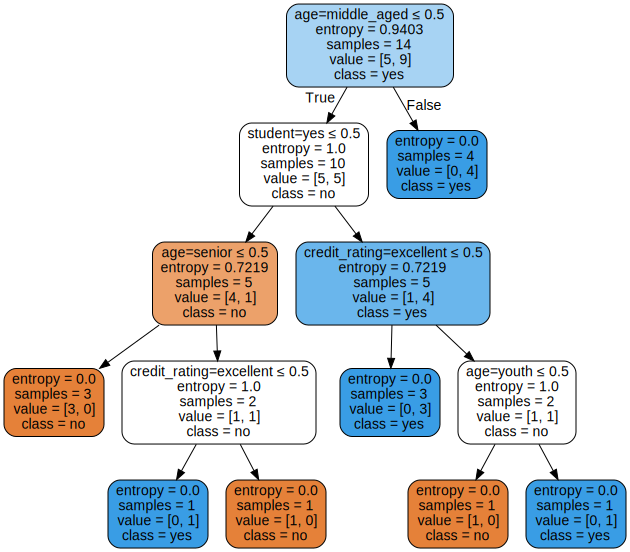

In [15]:
graph

In [16]:
vec.get_feature_names()

['age=middle_aged',
 'age=senior',
 'age=youth',
 'credit_rating=excellent',
 'credit_rating=fair',
 'income=high',
 'income=low',
 'income=medium',
 'student=no',
 'student=yes']

In [17]:
lb.classes_

array(['no', 'yes'], dtype='<U3')